# 시작하기 앞서

다음과 같은 몇가지 가정을 하고 시작하겠습니다.

- 가정1. 10x Genomics Single Cell Solution을 통해 얻은 서열 데이터를 사용
- 가정2. 리눅스(Ubuntu 22.04.3 LTS x86_64) OS를 사용하며 기본적인 shell 명령어를 앎
- 가정3. 패키지 매니저인 Anaconda에 대한 사용법을 알고 있음


터미널을 열고 원하는 폴더로 이동합니다. 저는 `/home/fkt/Downloads`에서 시작하도록 하겠습니다.

```bash
$pwd
/home/fkt/Downloads
```

# 가상환경 만들기

다음과 같이 사용가상환경을 만들어 사용합니다. 먼저 `TutorialEnvironment.yml` 파일을 다음 명령어로 다운받습니다. 

> 해당 파일에는 RNA velocity 분석을 위한 `velocyto` 도구의 dependancy 정보가 들어 있습니다.


```bash
wget https://cf.10xgenomics.com/supp/cell-exp/neutrophils/TutorialEnvironment.yml
```

다음 명령어로 가상환경을 만들어 줍니다.

```bash
conda env create --file TutorialEnvironment.yml
```

만들어진 가상환경을 활성화 시킵니다.

```bash
conda activate tutorial
```

다운로드 받은 `yml`파일은 삭제해줍니다.

```bash
rm TutorialEnvironment.yml
```

# Cell ranger 설치

10x Genomics Single Cell Solution을 통해 single cell RNA sequncing을 했다면 `10x Genomics`에서 `Cell ranger`라는 alignment 도구를 제공하고 있습니다. 속도는 좀 느려도 사용 용이성은 좋아서 저는 `Cellranger`를 추천합니다. 자세한 것은 [공식사이트](https://www.10xgenomics.com/support/software/cell-ranger)를 참고하시기 바랍니다.

## 시스템 요구사항

`Cellranger`는 리눅스 시스템에서 작동하며 다음의 최소 사양을 요구합니다:

- 8-core Intel or AMD processor (16 cores recommended).
- 64GB RAM (128GB recommended).
- 1TB free disk space.
- 64-bit CentOS/RedHat 7.0 or Ubuntu 14.04 - See the 10x Genomics OS Support page for details.

터미널에 다음 명령어를 입력해 `cell ranger 7.2`버전을 다운로드 합니다.

> 현재 기준으로 7.2 버전이 최신입니다.

```bash
wget -O cellranger-7.2.0.tar.gz "https://cf.10xgenomics.com/releases/cell-exp/cellranger-7.2.0.tar.gz?Expires=1695129121&Key-Pair-Id=APKAI7S6A5RYOXBWRPDA&Signature=ZipqR8Pg4YvVDQ3MvAVuuiPwEOC5c39~Wj0WTAxfoJW6xtrxqIFgIDySFSFnsWcwDpmAovJGrHXU24Y9Cptt88OJSPdEupyFRXoGKJvVzRtDJChmuMbSpVCy-2N-QnMKwxNtd8Yt8Mdp2Vcq4wxx1hVC0Yx54c7U9o~RFXIVsIp48thKR6JnKhJmCAC5U4dFLa86~NcB4s5Ic4HATrQP2KyWexyYZWgmBEw13mlKYtlVRUil0zseoq0-CZyGmE8oB0iDBSUBAyIqo~XMVjv~lkMz4cRcyCbQKBRDr~U36FM2KnE3rhv-Rlp4KD-uXCReRnBsY6N6t-HxpS2YDpN3mQ__"
```

그리고 나서 다음 명령어로 압축을 풀어줍니다.

```bash
tar -xvf cellranger-7.2.0.tar.gz
```

`cellranger-7.2.0` 폴더로 이동하기

```bash
cd cellranger-7.2.0
```

정상적으로 되었다면 아래와 같은 폴더 구조를 볼 수 있습니다.

```bash
.
├── bin
├── builtwith.json
├── cellranger -> bin/cellranger
├── external
├── lib
├── LICENSE
├── mro
├── probe_sets -> external/tenx_feature_references/targeted_panels
├── sourceme.bash
├── sourceme.csh
└── THIRD-PARTY-LICENSES.cellranger.txt

5 directories, 6 files
```

이제 `./cellranger`명령어를 입력하면 아래와 같이 cell ranger 실행이 가능합니다.

```bash
./cellranger
cellranger cellranger-7.2.0

Process 10x Genomics Gene Expression, Feature Barcode, and Immune Profiling data

Usage: cellranger <COMMAND>

Commands:
  count           Count gene expression and/or feature barcode reads from a single sample and GEM well
(중략)
  help            Print this message or the help of the given subcommand(s)

Options:
  -h, --help     Print help
  -V, --version  Print version
```

# FASTQ 파일과 레퍼런스 데이터 준비

10x Genomics사에서는 학습을 위한 데이터를 제공하고 있습니다. 이미 많은 예제에서 `Human 1k PBMC`를 다루고 있으므로 저는 `Mouse 1k neuron`으로 진행해보겠습니다. `Human 1k PBMC`은 직접해보시기 바랍니다.

## Human PBMC 1k 데이터 다운로드

터미널에 다음과 같이 입력합니다.

```bash
mkdir data && cd data
#  Human PBMC 1k = 5.17GB
wget https://cf.10xgenomics.com/samples/cell-exp/3.0.0/pbmc_1k_v3/pbmc_1k_v3_fastqs.tar
tar -xvf pbmc_1k_v3_fastqs.tar
# Human reference (GRCh38) = 11GB
wget https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-GRCh38-2020-A.tar.gz
tar -zxvf refdata-gex-GRCh38-2020-A.tar.gz
```

## Mouse 1k neuron 데이터 다운로드

터미널에 다음과 같이 입력합니다.

```bash
# Mouse neron 1k data = 7GB
wget http://cf.10xgenomics.com/samples/cell-exp/3.0.0/neuron_1k_v3/neuron_1k_v3_fastqs.tar
tar -xvf neuron_1k_v3_fastqs.tar
# Mouse reference = 9.7GB
wget https://cf.10xgenomics.com/supp/cell-exp/refdata-gex-mm10-2020-A.tar.gz
tar -zxvf refdata-gex-mm10-2020-A.tar.gz
```

## 다운로드된 파일 확인 

정상적으로 진행되었다면 아래와 같은 폴더와 52개의 파일을 확인할 수 있습니다.

```bash
$ tree .
.
├── neuron_1k_v3_fastqs
│   ├── neuron_1k_v3_S1_L001_I1_001.fastq.gz
│   ├── neuron_1k_v3_S1_L001_R1_001.fastq.gz
│   ├── neuron_1k_v3_S1_L001_R2_001.fastq.gz
│   ├── neuron_1k_v3_S1_L002_I1_001.fastq.gz
│   ├── neuron_1k_v3_S1_L002_R1_001.fastq.gz
│   └── neuron_1k_v3_S1_L002_R2_001.fastq.gz
├── pbmc_1k_v3_fastqs
│   ├── pbmc_1k_v3_S1_L001_I1_001.fastq.gz
│   ├── pbmc_1k_v3_S1_L001_R1_001.fastq.gz
│   ├── pbmc_1k_v3_S1_L001_R2_001.fastq.gz
│   ├── pbmc_1k_v3_S1_L002_I1_001.fastq.gz
│   ├── pbmc_1k_v3_S1_L002_R1_001.fastq.gz
│   └── pbmc_1k_v3_S1_L002_R2_001.fastq.gz
├── refdata-gex-GRCh38-2020-A
│   ├── fasta
│   ├── genes
│   │   └── genes.gtf
│   ├── pickle
│   ├── reference.json
│   └── star
└── refdata-gex-mm10-2020-A
    ├── fasta
    ├── genes
    │   └── genes.gtf
    ├── pickle
    ├── reference.json
    └── star

12 directories, 52 files
```

# Cell ranger 사용하기

데이터가 준비되었으니 `Cell ranger`를 사용해 `count matrix`를 만들어 보겠습니다.
먼저 상위 디렉토리인 `cellranger-7.2.0`으로 이동합니다.

```bash
cd ..
```

다음과 같이 `cellranger count` 명령어를 사용하면 `count matrix`데이터를 얻을 수 있습니다.

```bash
./cellranger count --id=run_count_mNeuron1k \
--fastqs=data/neuron_1k_v3_fastqs  \
--sample=neuron_1k_v3  \
--transcriptome=data/refdata-gex-mm10-2020-A
```

`--id`는 생성되는 폴더명이며 `--fastqs`는 다운로드한 `fastq`파일의 위치입니다. 
`--sample`은 fastq 파일명의 접두사(prefix)를 의미하고 `--transcriptome`은 레퍼런스데이터의 위치입니다.

시간이 좀 지나면 다음과 같은 출력을 볼 수 있습니다.

```bash
Running preflight checks (please wait)...
Checking sample info...
Checking FASTQ folder...
Checking reference...
(후략)

```

정상적으로 작업이 완료된다면 아래처럼 `outs`이라는 폴더가 생성됩니다. 여기에는 `count matrix`뿐만 아니라 여러가지 분석 결과도 포함되어 있어 복잡해보입니다. 그러나 저희가 필요 한 것은 `filtered_feature_bc_matrix` 폴더 안에 다들어 있습니다.

```bash
outs
├── analysis
├── cloupe.cloupe
├── filtered_feature_bc_matrix
├── filtered_feature_bc_matrix.h5
├── metrics_summary.csv
├── molecule_info.h5
├── possorted_genome_bam.bam
├── possorted_genome_bam.bam.bai
├── raw_feature_bc_matrix
├── raw_feature_bc_matrix.h5
└── web_summary.html
```

# RNA velocity 분석을 위한 작업

RNA velocity이란? 스플라이싱된 RNA와 아직 스플라이싱되지 않은 RNA를 구분해 세포의 상태를 예측하는 기법으로 scRNA 데이터에서 클러스터간에 분화 과정에 대한 단서를 얻을 수 있습니다. 예를 들어 아래 그림에서 보면 cluster4에서 cluster2로의 방향성을 확인 할 수 있습니다.

![](https://cdn.10xgenomics.com/image/upload/c_scale,w_600/v1646345944/analysis-guides/velocity-tutorial/scVelo-umap-cluster.png)

안타깝게도 `Cell ranger`를 통해 얻은 `count matrix`로는 RNA velocity 분석을 할 수 없습니다. 추가적으로 `velocyto`이라는 도구를 사용해 unspliced , spliced 데이터가 포함된 `loom`파일을 만들어야 합니다. 아래 명령어를 사용하면 간단하게 얻을 수 있습니다. 

```bash
velocyto run10x run_count_mNeuron1k/ data/refdata-gex-mm10-2020-A/genes/genes.gtf
```

실행이 완료되는 시간은 생각보다 오래 걸립니다.

```bash
2023-09-19 10:01:22,756 - DEBUG - Using logic: Default
2023-09-19 10:01:22,757 - DEBUG - Example of barcode: AAACGAATCAAAGCCT and cell_id: run_count_mNeuron1k:AAACGAATCAAAGCCT-1
(중략)
2023-09-19 10:27:23,985 - DEBUG - 1991314 reads were skipped because no apropiate cell or umi barcode was found
2023-09-19 10:27:23,985 - DEBUG - Counting done!
2023-09-19 10:27:23,988 - DEBUG - Collecting row attributes
2023-09-19 10:27:24,014 - DEBUG - Generating data table
2023-09-19 10:27:24,056 - DEBUG - Writing loom file
2023-09-19 10:27:25,286 - DEBUG - Terminated Succesfully!
```

완료가 되면 `run_count_mNeuron1k`폴더안에 `velocyto`라는 새로운 폴더가 생기고 `run_count_mNeuron1k.loom` 파일이 생성됩니다.


# Count matrix 데이터 읽기

이제 힘든 데이터 준비 과정이 모두 끝났습니다. 데이터 분석을 시작해보죠. scRNA-seq 분야는 아직 초기이고 새로운 도구들이 계속 쏟아지고 있습니다. 나중은 어떻게 될지 모르겠지만 지금 시점에서는 `R`에 익숙하다면 `Seurat`, `Python`에 익숙하다면 `Scanpy`를 추천합니다.

> 참고로 속도적인 측면과 ML을 접목하기에는 Scanpy가 더 강점을 가지고 있습니다.

## Scanpy 사용하기

다음 코드를 통해 count matrix를 scanpy로 불러 올 수 있습니다.

In [1]:
# conda install pandas scanpy
import pandas as pd
import scanpy as sc

# Cell ranger 결과 파일이 들어있는 경로
file_path = "../input/run_count_mNeuron1k/outs/filtered_feature_bc_matrix"

# read_10x_mtx 함수를 사용
adata = sc.read_10x_mtx(
    file_path,
    var_names='gene_symbols',
    cache=True)
adata

AnnData object with n_obs × n_vars = 1311 × 32285
    var: 'gene_ids', 'feature_types'

scVelo를 사용해 RNA velocity분석을 한다면 아래의 추가적인 코드가 필요합니다.

In [2]:
# conda install -c bioconda scvelo
import scvelo as scv

# load loom files for spliced/unspliced matrices for each sample
loom = scv.read(f"{file_path}/run_count_mNeuron1k.loom", validate=False, cache=False)

# rename barcodes in order to merge:
barcodes = [bc.split(':')[1] for bc in loom.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '-1' for bc in barcodes]
loom.obs.index = barcodes

# make variable names unique
loom.var_names_make_unique()

# merge matrices into the original adata object
adata = scv.utils.merge(adata, loom)
adata

AnnData object with n_obs × n_vars = 1311 × 32285
    obs: 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

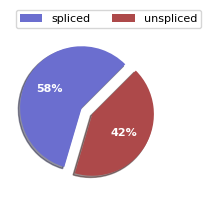

In [3]:
scv.pl.proportions(adata)

scanpy는 `*.h5ad` 포멧을 사용해 `count matrix`를 저장합니다. 아래 코드를 사용하면 단일 파일로 모든 것을 저장할 수 있습니다.

In [ ]:
adata.write("../output/mNeuron1k.h5ad", compression='gzip')

## Seurat 사용하기

`R`에 좀 더 익숙하시다면 `Seurat`을 사용하세요. 저는 파이썬 문법을 더 좋아하지만 솔직히 분석 도구의 완성도 측면에서는 `Seurat`이 더 나은 것 같습니다. 아래 코드는 `jupyter notebook`에서 `R`코드를 사용하기 위해 필요한 것으로 `rStudio`를 사용하신다면 `%%R`이 포함된 셀의 코드만 사용하시면 됩니다.

In [4]:
import logging
import rpy2.rinterface_lib.callbacks as rcb
# import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
%load_ext rpy2.ipython

필요한 `Seurat` 라이브러리를 불러옵니다.

In [5]:
%%R
library(dplyr)
library(Seurat)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

아래의 코드를 사용하면 `count matrix`를 `Seurat object`로 만들 수 있습니다.

In [6]:
%%R
# Load dataset
neuron.data <- Read10X(data.dir = "../input/run_count_mNeuron1k/outs/filtered_feature_bc_matrix")
# Initialize the Seurat object.
obj <- CreateSeuratObject(counts = neuron.data)
obj

An object of class Seurat 
32285 features across 1311 samples within 1 assay 
Active assay: RNA (32285 features, 0 variable features)


`Seurat object`를 파일로 저장하는 방법에도 여러가지가 있지만 `R`에서 많이 사용되는 `*.rds`를 사용하는 코드는 아래와 같습니다. 

In [8]:
%%R
saveRDS(obj, file = "../output/mNeuron1k.rds")

# 마치며

이것으로 scRNA seq 데이터의 전처리 과정을 알아봤습니다. 여기 적힌 방법 외에도 더 효율적이고 나은 방법도 있고 앞으로도 더 생겨날 것입니다. 그러나 저도 배우는 입장에서 다른 분들에게 도움이 되고자 정리를 해봤습니다. 실제 실험을 통해 얻은 데이터를 분석하는데 도움이 되길 바랍니다.
